In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import itertools
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def average_participant_results(results, k_folds=3):
    
    acc = 0
    f_score = 0
    conf_mat = np.zeros((3,3), dtype="int")
    
    for i in range(k_folds):
        acc += results["cv{}_accuracy".format(i)]
        f_score += results["cv{}_f_score".format(i)]
       
        # dealing with different size confusion matrices / shouldn't be larger than 3,3
        cm = np.array(results["cv{}_conf_mat".format(i)], dtype="int")
        idx_y = conf_mat.shape[0] - cm.shape[0]
        idx_x = conf_mat.shape[1] - cm.shape[1]
        conf_mat[:-idx_y or None, :-idx_x or None] += cm
        
    return acc / k_folds, f_score / k_folds, conf_mat

In [4]:
def average_experiment_results(results, participants, k_folds=3):
    
    exp_acc = 0
    exp_f = 0
    exp_cm = np.zeros((3,3), dtype="int")
    
    for p in participants:
        acc, f_score, cm = average_participant_results(results[p], k_folds)
        exp_acc += acc
        exp_f += f_score
        
        diff_x = (exp_cm.shape[1] - cm.shape[1]) * -1
        diff_y = (exp_cm.shape[0] - cm.shape[0]) * -1
        exp_cm[:diff_y or None,:diff_x or None] += cm
        
    return exp_acc / len(participants), exp_f / len(participants), exp_cm

In [120]:
def plot_confusion_matrix(cms, classes, participants, title,
                          normalize=False,
                          cmap=plt.cm.Blues, name=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(8,8))
    plt.suptitle(title, fontsize=16)
    for i, (cm, p) in enumerate(zip(cms, participants)):
    
        cm_og = cm.copy()
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#             print("Normalized confusion matrix")
        else:
#             print('Confusion matrix, without normalization')
              pass
        
        plt.subplot(2, 2, i+1)
        plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1.0)
        plt.title(p)
#         if i+1 == len(participants):
#             plt.colorbar()
        tick_marks = np.arange(len(classes))
        
        if i % 2 == 0:
            plt.ylabel('True label')
            plt.yticks(tick_marks, classes)
        else:
            plt.yticks([])
            
        if i > 1:
            plt.xticks(tick_marks, classes, rotation=30)
            plt.xlabel('Predicted label')
        else:
            plt.xticks([])
                

        #     fmt = '.2f' if normalize else 'd'
        fmt = 'd'
        thresh = 1. / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm_og[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

#         plt.tight_layout()

    if name is not None:
        plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/{}.jpg".format(name))
        

In [121]:
participants = ["p1", "p3", "p4", "p6"]
exercises = ["a", "b", "c", "d", "e"]
smotes = ["regular", "boderline1", "borderline2", "svm", "adasyn", "none"]
exp_num = 0
results = {}

for kind in smotes:
    exp_num += 1

    results[kind] = np.load("results/exercise_smote_results/cmj_exp-exercise-smote_results_{}.pkl".format(exp_num))

In [41]:
participants = ["p1", "p3", "p4", "p6"]
exercises = ["a", "b", "c", "d", "e"]
smotes_8 = ["regular", "boderline1", "borderline2", "svm", "adasyn", "none"]
exp_num = 0
results_8 = {}

for kind in smotes_8:
    exp_num += 1
    
    results_8[kind] = np.load("results/exercise_smote_results/cmj_exp-exercise-smote-8-1_results_{}.pkl".format(exp_num))

In [72]:
accs, fs, cms = [], [], []
for kind in smotes:
        
    r = results[kind]

    exp_accs, exp_fs, exp_cms = [], [], []

    for p in participants:
        acc, f_score, cm = average_participant_results(r[p], k_folds=5)

        exp_accs.append(acc)
        exp_fs.append(f_score)
        exp_cms.append(cm)

    accs.append(exp_accs)
    fs.append(exp_fs)
    cms.append(exp_cms)

accs = np.array(accs)
fs = np.array(fs)
cms = np.array(cms)

l = len(accs)

In [73]:
accs_8, fs_8, cms_8 = [], [], []

for kind in smotes_8: 
    r = results_8[kind]

    exp_accs, exp_fs, exp_cms = [], [], []

    for p in participants:
        acc, f_score, cm = average_participant_results(r[p], k_folds=5)

        exp_accs.append(acc)
        exp_fs.append(f_score)
        exp_cms.append(cm)

    accs_8.append(exp_accs)
    fs_8.append(exp_fs)
    cms_8.append(exp_cms)

accs_8 = np.array(accs_8)
fs_8 = np.array(fs_8)
cms_8 = np.array(cms_8)

l_8 = len(accs_8)

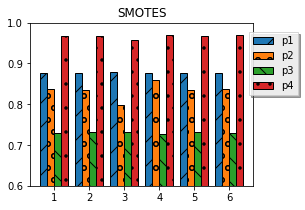

In [74]:
idx = np.arange(l) + 1
width = .2

plt.figure(figsize=(4,3))
plt.ylim([.6, 1.0])
plt.yticks(np.linspace(.6, 1.0, 5))
# plt.xticks(idx,["128x128", "90x160", "130x190", "96x96"])

plt.title("SMOTES")
plt.bar(idx-(width*1+width/2), accs[:,0], width, hatch="/", edgecolor='black')
plt.bar(idx-(width*0+width/2), accs[:,1], width, hatch="o", edgecolor='black')
plt.bar(idx+(width*1-width/2), accs[:,2], width, hatch="\\", edgecolor='black')
plt.bar(idx+(width*2-width/2), accs[:,3], width, hatch=".", edgecolor='black')
plt.legend(["p1", "p2", "p3", "p4"], loc='center left', bbox_to_anchor=(.96, 0.75), fancybox=False, shadow=True)

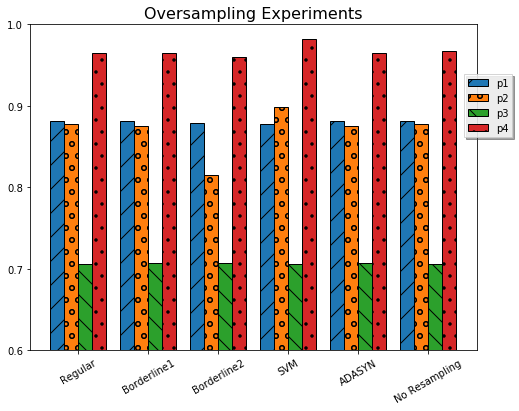

In [117]:
idx = np.arange(l_8) + 1
width = .2

plt.figure(figsize=(8,6))
plt.ylim([.6, 1.0])
plt.yticks(np.linspace(.6, 1.0, 5))
plt.xticks(idx,["Regular", "Borderline1", "Borderline2", "SVM", "ADASYN", "No Resampling"], rotation=30)

plt.title("Oversampling Experiments", fontsize=16)
plt.bar(idx-(width*1+width/2), accs_8[:,0], width, hatch="/", edgecolor='black')
plt.bar(idx-(width*0+width/2), accs_8[:,1], width, hatch="o", edgecolor='black')
plt.bar(idx+(width*1-width/2), accs_8[:,2], width, hatch="\\", edgecolor='black')
plt.bar(idx+(width*2-width/2), accs_8[:,3], width, hatch=".", edgecolor='black')
plt.legend(["p1", "p2", "p3", "p4"], loc='center left', bbox_to_anchor=(.96, 0.75), fancybox=False, shadow=True)
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/smote-acc.jpg")

In [48]:
np.average(accs, axis=1)

array([ 0.85307189,  0.85318866,  0.84177081,  0.85883094,  0.85319911,
        0.8526762 ])

In [49]:
np.average(accs_8, axis=1)

array([ 0.85751761,  0.85685784,  0.84030454,  0.86600488,  0.85704228,
        0.85811056])

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


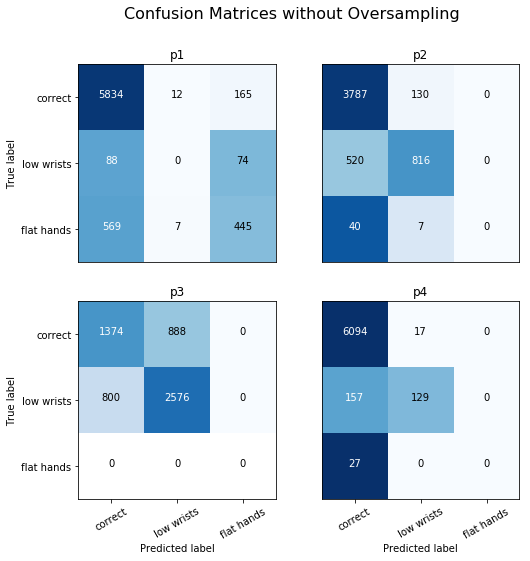

In [122]:
plot_confusion_matrix(cms_8[5,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], "Confusion Matrices without Oversampling", normalize=True, name="cm-nosmote")

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


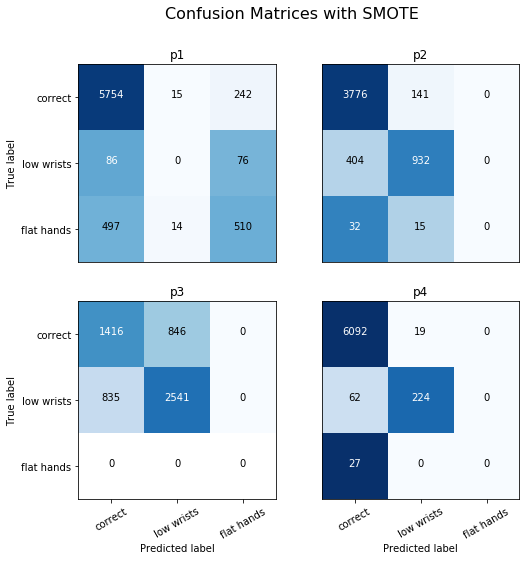

In [115]:
plot_confusion_matrix(cms_8[3,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], "Confusion Matrices with SMOTE", normalize=True, name="cm-smvsmote")

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


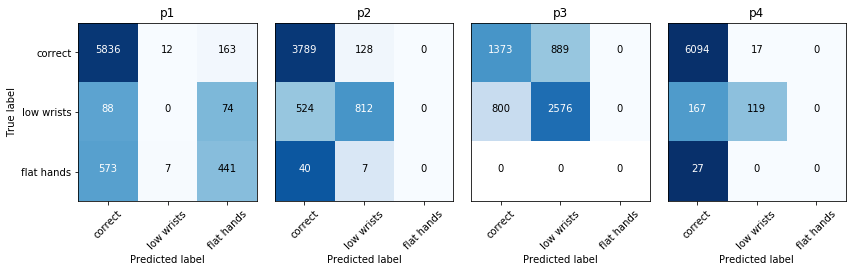

In [68]:
plot_confusion_matrix(cms_8[0,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], normalize=True)

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


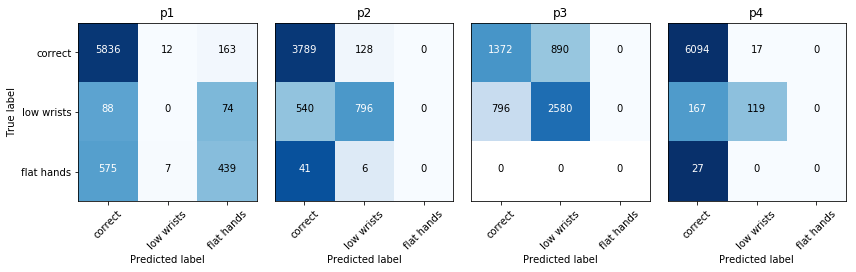

In [69]:
plot_confusion_matrix(cms_8[1,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], normalize=True)

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


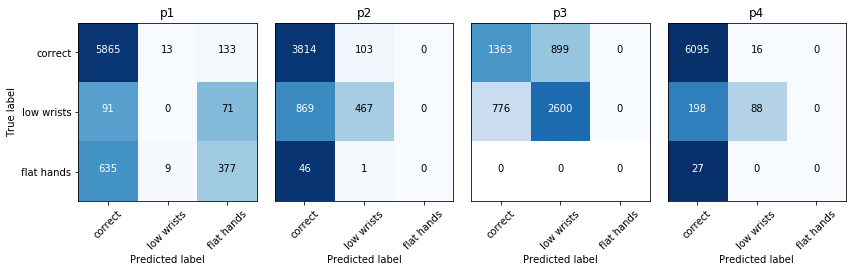

In [78]:
plot_confusion_matrix(cms_8[2,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], normalize=True)

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


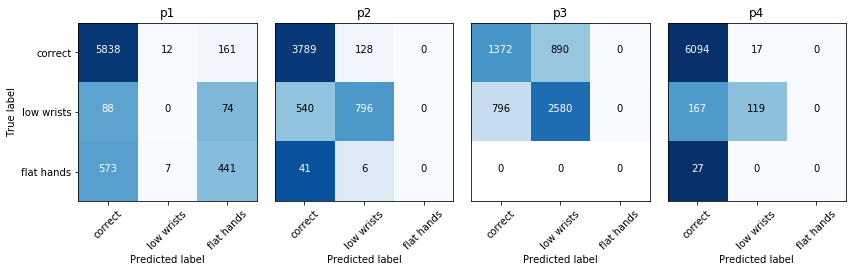

In [79]:
plot_confusion_matrix(cms_8[4,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], normalize=True)

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


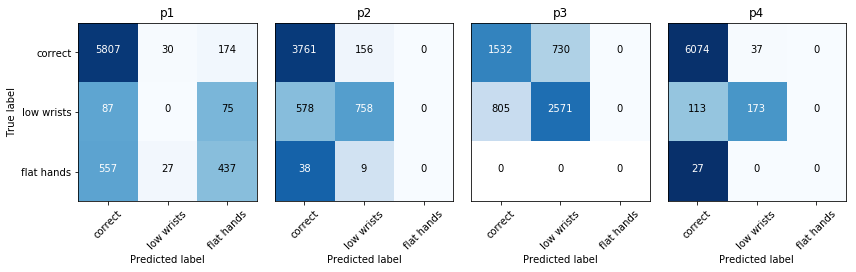

In [82]:
plot_confusion_matrix(cms[3,:], ["correct", "low wrists", "flat hands"], ["p1", "p2", "p3", "p4"], normalize=True)